# Sephora Dataset Exploratory Data Analysis

In this project, I aim to cover the following:
- Analysing the price of the products sold in Sephora
- Analysing the reviews of products sold in Sephora
- Sales forecast prediction

## Importing and Cleaning Data

Firstly, we will retrieve the dataset from Kaggle by running the Kaggle API. The Kaggle API allows us to download datasets directly from Kaggle to our local environment. To use the Kaggle API, follow these steps:

### Importing Datasets 

In [1]:
#!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews
#!unzip sephora-products-and-skincare-reviews.zip

Since the dataset is downloaded as CSV files, we shall save the information from the CSV files into a pandas Dataframe.

In [2]:
import os
import pandas as pd

# assign path
path, dirs, files = next(os.walk("data/"))
file_count = len(files)
# create empty list
dataframes_list = []
names_list = []

# checking number of data frames
check = 1

# append datasets to the list 
for i in range(file_count):
    temp_df = pd.read_csv("data/"+files[i])
    dataframes_list.append(temp_df)
    names_list.append(files[i].split(".")[0])

# assign each name to its corresponding data set
for name, df in zip(names_list, dataframes_list):
    globals()[name] = df

# display datasets
for name in names_list:
    print(f"Data set name: {name}")
    check += 1

#check the numebr of data frames created in total
print(check)

/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_92483/4287295079.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv("data/"+files[i])
/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_92483/4287295079.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv("data/"+files[i])
/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_92483/4287295079.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv("data/"+files[i])


Data set name: product_info
Data set name: reviews_0-250
Data set name: reviews_1250-end
Data set name: reviews_750-1250
Data set name: reviews_250-500
Data set name: reviews_500-750
7


### Putting Dataframes into SQLite database

To allow for the use of SQL queries to query for data, we will save the data into an SQLite database. Besides the ability to use SQL queries, saving our data into an SQLite database has the following benefits:
- *Portability*: the SQLite database (in this case, Sephora.db) is stored into a single file, making it easier to move and share across different systems.
- *Simplicity*: Since SQLite is a severless database engine, it does not require a separate server process. This makes it easier to set up and use.
- *Efficiency*: SQLite is lightweight and efficient, making it suitable for small to medium sized applications.

In [3]:
import sqlite3

#connect to a SQLite database
conn = sqlite3.connect('sephora.db')

# writing data frames into database
for i in range(len(dataframes_list)):
    dataframes_list[i].to_sql(names_list[i], conn, if_exists='replace', index=False)

In [4]:
# verify content of database
count = 1
for names in names_list:
    print(names)
    count += 1

# check number of data frames written into the database
print(count)

product_info
reviews_0-250
reviews_1250-end
reviews_750-1250
reviews_250-500
reviews_500-750
7


### Understanding each dataset

Before we can dive into analysing the data, we will first look at what the different datasets are, and see if we can simplify them.

In [5]:
for names in names_list:
    # query the database assign the result to a data frame
    df = pd.read_sql_query(f'SELECT * FROM "{names}"', conn)

    # display the data frame
    print(names)
    display(df.head())

product_info


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,None,None,None,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


reviews_0-250


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,None,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,None,None,None,None,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,None,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,None,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


reviews_1250-end


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,None,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


reviews_750-1250


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,8554483509,2,0.0,NaN,0,0,0,2023-03-21,This was gifted by Supergoop! in exchange for ...,Nice packaging but easy to overuse,light,brown,combination,None,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
1,1,24710523057,2,0.0,1.000000,2,0,2,2023-03-07,I didn’t like it; too much product comes out w...,Packaging is not suits le,None,brown,combination,None,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
2,2,8429283179,5,1.0,0.941176,34,2,32,2023-03-01,Y’all….I’m begging for everyone to read instru...,PLS READ THIS LOL,light,green,normal,brown,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
3,3,8105185455,1,0.0,0.000000,5,5,0,2023-02-27,I have not figured out how to use this product...,At a loss,tan,brown,combination,black,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
4,4,1515931062,1,0.0,0.000000,7,7,0,2023-02-27,I’m at a loss as to how to use this thing!!! C...,NOT for me!!,fair,blue,combination,blonde,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0


reviews_250-500


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,None,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99


reviews_500-750


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2079014373,5,1.0,NaN,0,0,0,2023-03-14,These are the only pimple patches I’ve used th...,Best Pimple Patches,medium,blue,normal,None,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
1,1,12631885517,4,1.0,NaN,0,0,0,2023-02-08,One of my ingrown hair turned inflamed and sor...,It works!,mediumTan,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
2,2,2321761961,5,1.0,1.0,1,0,1,2023-02-05,I have tried 10 different acne/blemish patches...,Good for a large or painful breakout! Sleep in...,None,hazel,combination,blonde,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
3,3,1380382883,4,1.0,NaN,0,0,0,2023-01-24,"Love these for my mid-size breakouts, specifyi...",Micro tips are a plus!!,light,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
4,4,8871759068,4,1.0,1.0,1,0,1,2023-01-15,Best so far - though still not particularly ef...,None,None,None,None,None,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0


### Merging dataset

Since the reviews have identical columns, we can join them together to make it easier to query and explore the dataset.

In [6]:
total_rows = 0
total = []
for names in names_list[1:]:
    print(names)
    df = pd.read_sql_query(f'SELECT * FROM "{names}"', conn)
    total.append(df)
    total_rows += df.shape[0]

joined_reviews = pd.concat(total, axis = 0).drop('Unnamed: 0', axis = 1)
display(joined_reviews.head())
print(total_rows)
print(total_rows == joined_reviews.shape[0])


reviews_0-250
reviews_1250-end
reviews_750-1250
reviews_250-500
reviews_500-750


,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,None,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,None,None,None,None,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,None,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,None,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


1094411
True


Looking at this, we understand that after merging all the review datasets together, we arrive at a dataset with a total of 1,094,411 rows.

#### Cleaning merged data

In [7]:
joined_reviews = joined_reviews.drop_duplicates()

# if values in key columns, are missing, drop the row
joined_reviews = joined_reviews.dropna(subset=['product_id', 'brand_name', 'price_usd'])

#### Writing new dataset into database

In [8]:
joined_reviews.to_sql('total_reviews', conn, if_exists='replace', index=False)

1094187

## Count of products

In [9]:
df = pd.read_sql_query("""
    SELECT primary_category, COUNT(*) + SUM(child_count) AS total_products
    FROM product_info
    GROUP BY primary_category
""", conn)
display(df)

,primary_category,total_products
0,Bath & Body,583
1,Fragrance,2419
2,Gifts,36
3,Hair,1939
4,Makeup,13585
5,Men,71
6,Mini Size,551
7,Skincare,3098
8,Tools & Brushes,71


## Price distribution

Firstly, let us examine the summary statistics of the price data.

In [10]:
from decimal import Decimal

df = pd.read_sql_query("""SELECT price_usd 
                       FROM total_reviews""", conn)
df = df.describe()

# Convert each value to Decimal, round it to 2 decimal places, and format it as a string without scientific notation
df = df.map(lambda x: f"{Decimal(x).quantize(Decimal('0.01')):.2f}")

display(df)

,price_usd
count,1094187.00
mean,49.01
std,40.04
min,3.00
25%,25.00
50%,39.00
75%,62.00
max,1900.00


From this, we can see that the distribution of price is extremely large, ranging from as low as USD$3 to as high as USD$1900. Despite this, the median is USD$39, meaning that there could be outliers on the right end, making the maximum value extremely large.

,price_usd
0,19.0
1,24.0
2,24.0
3,24.0
4,24.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


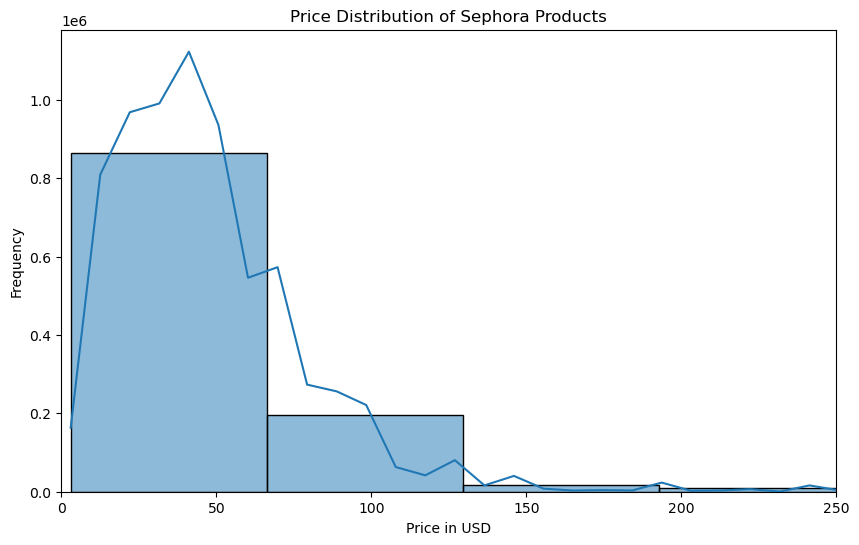

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# query the database
df = pd.read_sql_query("""SELECT price_usd 
                       FROM total_reviews""", conn)

# display the data frame
display(df.head())

# plot the data
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.xlim(0, 250)
plt.title('Price Distribution of Sephora Products')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')

plt.show()


In [12]:
num = pd.read_sql_query("""SELECT COUNT(DISTINCT brand_name) AS "number of brands" 
                        FROM total_reviews""", conn)
print(num)

   number of brands
0               142


Looking at this, we understand that the prices of products are rather left skewed, and mainly ranges from about USD$0 to USD$100. However, to do a better analysis of the price breakdown, we can further explore this by brand.

Since there are approximately 142 brands in Sephora, we will only explore the top 10 brands with the most number of reviews.

### Price distribution by brands

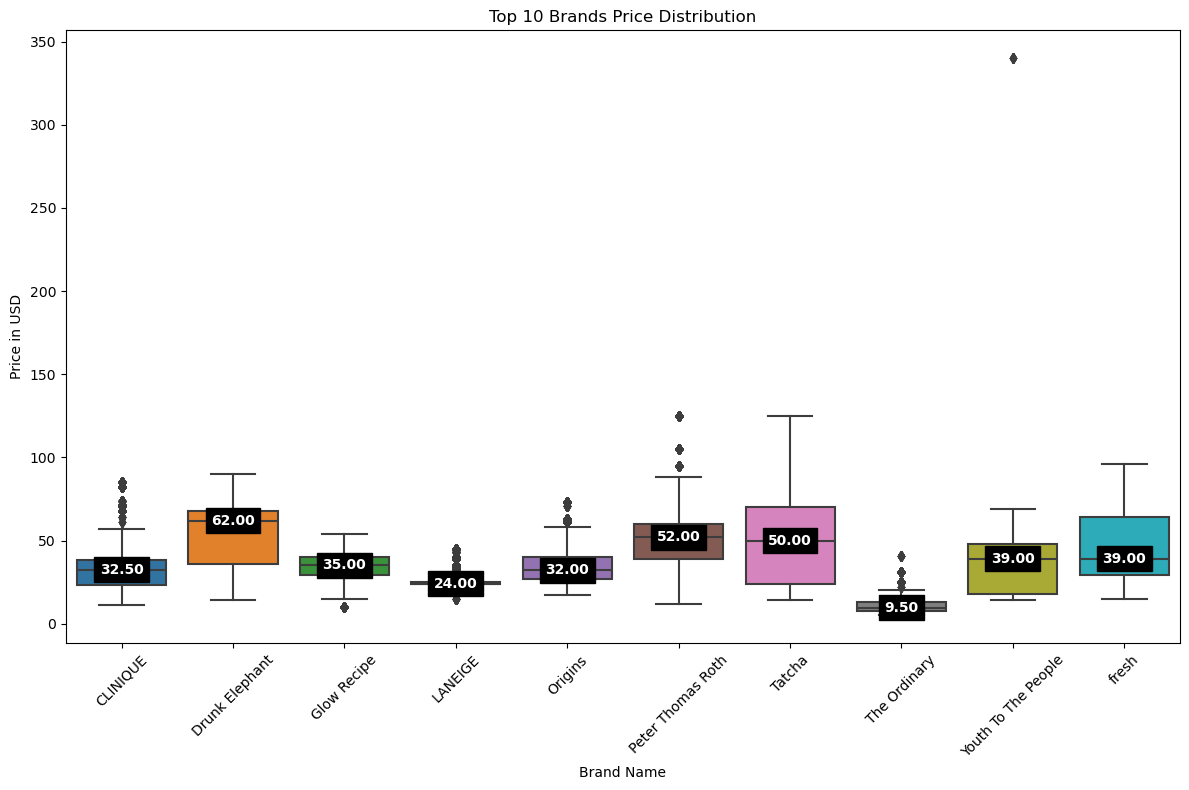

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the top 10 brands by count of reviews
brands = pd.read_sql_query("""SELECT brand_name, COUNT(brand_name), price_usd
                       FROM total_reviews
                       GROUP BY brand_name
                       ORDER BY COUNT(brand_name) DESC
                       LIMIT 10
                       """, conn)

# Retrieve all the reviews from the database
total_reviews = pd.read_sql_query("SELECT * FROM total_reviews", conn)

# Filter the reviews to only include the top 10 brands
df = total_reviews[total_reviews['brand_name'].isin(brands['brand_name'])]

# Sort the DataFrame by brand_name alphabetically
df = df.sort_values(by='brand_name')

# Plot the price distribution of the top 10 brands
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='brand_name', y='price_usd', data=df, order=sorted(df['brand_name'].unique()))
plt.xticks(rotation=45)

# Add title and labels
plt.title('Top 10 Brands Price Distribution')
plt.xlabel('Brand Name')
plt.ylabel('Price in USD')

# Adding median values into the plot
medians = df.groupby(['brand_name'])['price_usd'].median().values
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.2f}', ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='black'))

# Show the plot
plt.tight_layout()
plt.show()

Analysing the boxplot, we can derive some key observations:
- The median of the prices of the top 10 brands range from USD$9.50 to USD$62.00. This means that the central tendency of prices varies across brands.
- The IQR, which represents the middle 50% of the data, varies among brands. Some brands have a narrow IQR, indicating that their prices are more consistent, while others have a wider IQR, suggesting greater variability in prices.
- The whiskers extend to show the range of the data, typically up to 1.5 times the IQR from the quartiles. Brands with longer whiskers have a wider range of prices, indicating more variability.
- Points outside the whiskers are considered outliers. These outliers represent prices that are significantly higher or lower than the rest of the data. Identifying these outliers can help in understanding any unusual pricing patterns.
- The position of the median within the box can indicate skewness. If the median is closer to the bottom of the box, the data is skewed to the right (positive skew). If it is closer to the top, the data is skewed to the left (negative skew).

## Rating distribution

Besides prices, another factor that we can further examine is the ratings of the products given by customers of Sephora. 

To begin, we can first examine the summary statistics of the ratings.

In [14]:
df = pd.read_sql_query("""SELECT rating 
                       FROM total_reviews""", conn).describe()
df = df.map(lambda x: f"{Decimal(x).quantize(Decimal('0.01')):.2f}")
display(df)

,rating
count,1094187.00
mean,4.30
std,1.15
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


We can deduce from the summary statistics that half of the ratings are at 5.00, which are the maximum value that a rating can have. Thus, this means that the graph is left-skewed, with more ratings on the higher end. To better visualise this, we can use a histogram to plot the distribution of ratings.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


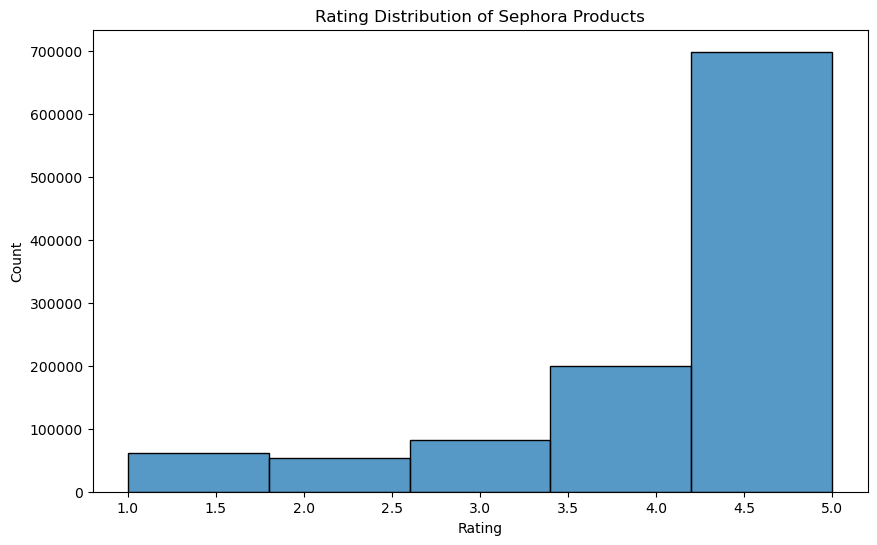

In [15]:
df = pd.read_sql_query("""SELECT rating 
                       FROM total_reviews""", conn)

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=5)
plt.title('Rating Distribution of Sephora Products')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

From this histogram, we can confirm that the graph is indeed left-skewed, with the tail towards smaller values.

### Price vs. Rating

Next, we can also investigate if there is any correlation between the price of the product, as well as its rating.

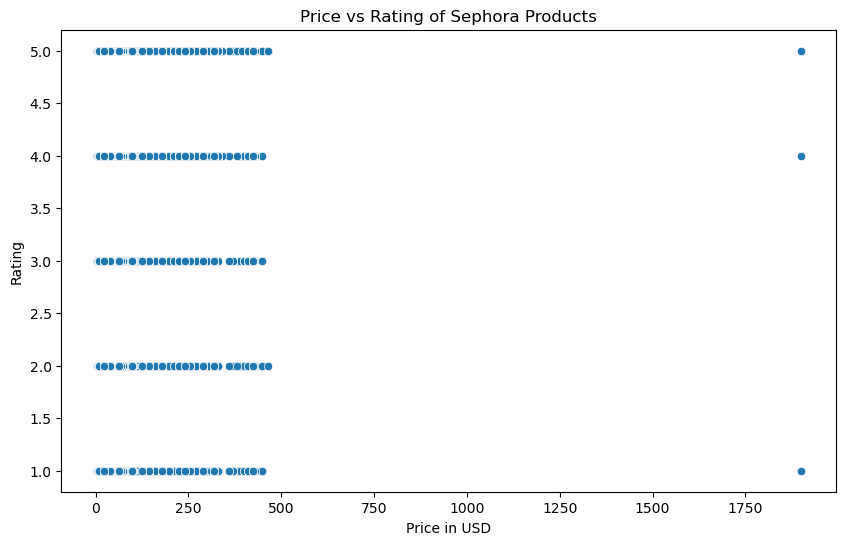

In [16]:
df = pd.read_sql_query("""SELECT price_usd, rating
                       FROM total_reviews""", conn)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_usd', y='rating', data=df)
plt.title('Price vs Rating of Sephora Products')
plt.xlabel('Price in USD')
plt.ylabel('Rating')
plt.show()

Looking at this plot, there are some observations that we can derive:
- There are some outliers that have a price of as high as more than USD$1750.
- The ratings are discreet, with the values: 1, 2, 3, 4 and 5.
- There is no apparent correlation between the price of the product and the rating that it receives from consumers.

## Correlation Analysis

,Price,Rating,Total Reviews
Price,1.000000,0.024705,-0.147776
Rating,0.024705,1.000000,0.346592
Total Reviews,-0.147776,0.346592,1.000000


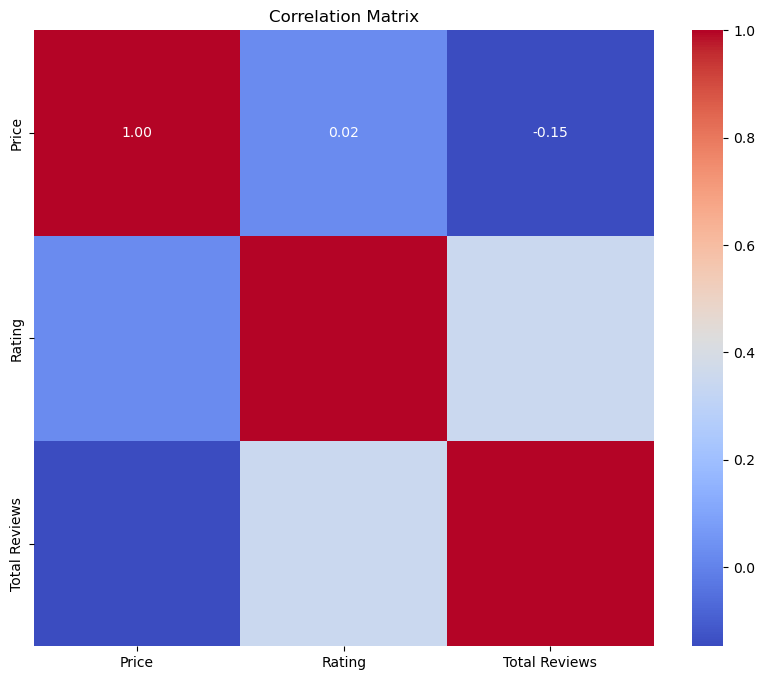

In [17]:
df = pd.read_sql_query("""
    SELECT price_usd AS Price, rating AS Rating, COUNT(*) AS "Total Reviews"
    FROM total_reviews
    GROUP BY price_usd, rating
""", conn)

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
display(corr_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From this correlation matrix, we can derive the following observations:
- *Price vs. Rating*: There is a very weak correlation between price and ratings (0.02). This suggests that there is almost no linear relationship between price and rating.
- *Price vs. Total Reviews*: There is a weak negative correlation (-0.15) between price and the total number of reviews. This indicates that more expensive products tend to have slightly fewer reviews, but the relationship is not strong.
- *Rating vs. Total Reviews*: There is a very weak positive correlation (0.02) between ratings and the total number of reviews. This suggests that there is almost no linear relationship between how products are rated and how many reviews they receive.

## Sales Forecast Prediction

Outline the steps you would take, the algorithms you might consider, and how you would evaluate the model's performance.

### Steps to take

1. Decide on an algorithm that best fits the data used
2. Split the data into training and testing data (80% training, 20% testing)
3. Train and fine tune the model using the training data
4. Test the model using the testing data
5. Evaluate the model performance

### 1.1. Algorithms to consider

#### Linear Regression

- Linear regression uses a linear equation to model the relationship between 2 or more variables. It finds the best-fit linear line between independent and dependent variables.
- A benefit of linear regression is that it is easy to understand and simple to implement.
- However, this algorithm only works well with variables that have a linear relationship between each other. Looking at the correlation analysis done previously, it seems that the key variables do not have a strong linear relationship. Thus, linear regression would not be a suitable model for the data used.

#### Logistic Regression

- Logistic regression estimates the probability of an event occurring, based on a given data set of independent variables.
- A benefit of logistic regression is that it can handle non-linear relationships, since it is based on probability.
- However, logistic regression has its downsides, as overfitting can occur. Overfitting is when the model becomes specifically trained for the training data, and performs badly when fed new data.
- A more prominent downside when logistic regression is used with this dataset is that the training of the model can take a long time, especially with a dataset as large as the one that is currently used.

#### Neural Networks

- Artificial neural networks reflect the behaviour of a human brain, where it is a simpler version of a biological neural network. It allows for the computer to spot some patterns and solve simpler patterns. They can be thought of as a mathematical function approximation, where we aim to find an approximate function between independent and dependent variables.
- A benefit is that complex relationships can be modelled, thus allowing for a more accurate prediction, especially with this dataset where the variables have weak linear correlation between each other.
- However, neural networks can take a long time to train, and in addition, would only work well with a large dataset. Although, with this dataset, it has approximately 1 million rows of data, thus allowing for greater accuracy when neural networks are used for sales forecast prediction.

#### Gradient Boosting Machines

- In boosting, each new tree is a fit on a modified version of the original data set. With gradient-boosting machine, several decision trees are combined into a single model, similar to random forest. However, instead of being generated randomly, they are generated sequentially such that each tree is "boosted" by the previous tree. Thus, accuracy of the predictions made by the model can improve.
- A benefit to gradient boosting machines is that it can produce accurate predictions when given a large dataset. With this data set, it is possible since it has approximately 1 million rows of data under the `total_reviews` table.
- However, a downside is that gradient boosting machines can take a long time to train.

### 1.2. Deciding on an algorithm

Algorithm to use: *Gradient Boosting Machine*

Reasons:
- Since this data set has a large amount of data (1,094,187 rows), we can be assured that it will provide the model with sufficient data to train.
- Despite taking a long time to train, a higher accuracy from the model trumps the time taken to train the model.
- It is also easy to implement in Python with the XGBoost library which uses the XGBoost algorithm. This algorithm produces fairly accurate results, and is a fast and effective implementation of gradient boosting, which counteracts the downside that it takes a long time to train the model.

### 2. Splitting the data 

#### Loading the data

Before we can begin to split the dataset, we will first have to retrieve the necessary data from our database.

In [26]:
df = pd.read_sql_query(""" SELECT product_id, price_usd, submission_time, rating, review_text
                       FROM total_reviews
                       """, conn)
display(df.dtypes)
display(df.head())

product_id          object
price_usd          float64
submission_time     object
rating               int64
review_text         object
dtype: object

,product_id,price_usd,submission_time,rating,review_text
0,P504322,19.0,2023-02-01,5,I use this with the Nudestix “Citrus Clean Bal...
1,P420652,24.0,2023-03-21,1,I bought this lip mask after reading the revie...
2,P420652,24.0,2023-03-21,5,My review title says it all! I get so excited ...
3,P420652,24.0,2023-03-20,5,I’ve always loved this formula for a long time...
4,P420652,24.0,2023-03-20,5,"If you have dry cracked lips, this is a must h..."


#### Cleaning data

In [27]:
df.isnull().sum()
df = df.dropna(subset=['review_text'])

#### Feature engineering

To aid in predictive modelling, we can create additional features.

In [ ]:
#pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 10.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


With sentiment analysis, the values range from -1 to 1, where the values reflect the polarity and subjectivity of a sentence. Polarity lies between [-1, 1]. -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity quantifies the amount of personal opinion and factual information in a text, and lies between [0, 1]. A subjectivity value of 1 indicates that the sentence contains purely personal opinions, while a value of 0 indicates that the sentence contains purely factual information/

In [28]:
from textblob import TextBlob

def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

df['sentiment'] = df['review_text'].apply(get_sentiment)

display(df.head())


,product_id,price_usd,submission_time,rating,review_text,sentiment
0,P504322,19.0,2023-02-01,5,I use this with the Nudestix “Citrus Clean Bal...,0.283333
1,P420652,24.0,2023-03-21,1,I bought this lip mask after reading the revie...,0.000000
2,P420652,24.0,2023-03-21,5,My review title says it all! I get so excited ...,0.102778
3,P420652,24.0,2023-03-20,5,I’ve always loved this formula for a long time...,0.381250
4,P420652,24.0,2023-03-20,5,"If you have dry cracked lips, this is a must h...",-0.127381


#### Understanding the data

In [31]:
df.describe().map(lambda x: f"{Decimal(x).quantize(Decimal('0.01')):.2f}")

,price_usd,rating,sentiment
count,1092743.00,1092743.00,1092743.00
mean,49.02,4.30,0.24
std,40.06,1.15,0.21
min,3.00,1.00,-1.00
25%,25.00,4.00,0.12
50%,39.00,5.00,0.23
75%,62.00,5.00,0.36
max,1900.00,5.00,1.00


To better understand the distribution of sentiment, we can plot a histogram of the sentiment values.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


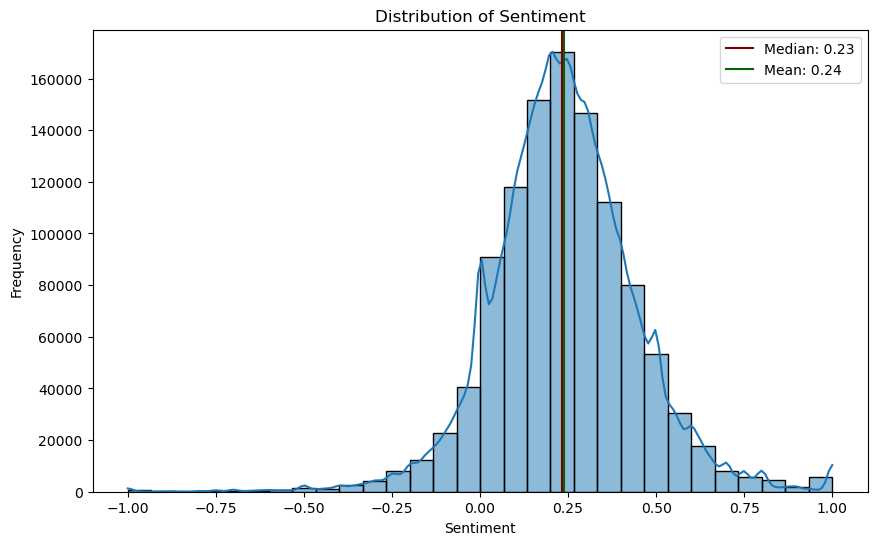

In [32]:
import numpy as np

median = np.median(df['sentiment'])
mean = np.mean(df['sentiment'])

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.axvline(median, color = "maroon", label=f"Median: {median:.2f}")
plt.axvline(mean, color = "darkgreen", label = f"Mean: {mean:.2f}")
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From this histogram, we understand that the histogram is very slightly left-skewed, with the median being at 0.23 and mean at 0.24. Thus, this means that the sentiment is rather equally divided between negative and positive sentiments.

#### Splitting data

To split the data, we can use the `sklearn` library. We choose the 80:20 train-test data ratio as it is optimal in machine learning to prevent overfitting. It also ensures stability, since 80% can still represent a vast amount of data for training.

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_usd', 'product_id', 'review_text'], axis=1)
Y = df['price_usd']

# Convert submission_time to datetime
X['submission_time'] = pd.to_datetime(X['submission_time'])

# If you want to extract features from the datetime column, you can do so
X['submission_year'] = X['submission_time'].dt.year
X['submission_month'] = X['submission_time'].dt.month
X['submission_day'] = X['submission_time'].dt.day

# Drop the original submission_time column if it's not needed
X = X.drop(columns=['submission_time'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 3. Training and fine tuning model

In [ ]:
#pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from scipy.stats import uniform, randint

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror'))
])

# Define hyperparameter grid for XGBRegressor
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': randint(3, 15),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__subsample': uniform(0.6, 0.4),
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(0, 1)
}

# Perform randomized search
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x_train, y_train)

# Best model
best_model = random_search.best_estimator_

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x4458fae10>>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


In [ ]:
y_pred = best_model.predict(x_test)

### 4. Evaluating model

To evaluate the model, we will use the following metrics:
1. **Mean Squared Error (MSE)**: A larger MSE means that there are larger errors, making it sensitive to outliers. 
    - A lower MSE value indicates better model performance.
2. **Mean Absolute Error (MAE)**: It provides a straightforward measure of average error magnitude.
    - Lower values indicate better model performance. However, it is less sensitive to outliers than MSE.
3. **R-squared**: It indicates how well the model explains the variability of the target variable.
    - Values range from 0 to 1, with higher values indicating better performance. An r-squared value of 1 means perfect prediction.
4. **Root Mean Squared Error (RMSE)**: It provides an error metric in the same unit as the target variable, making it easier to interpret.
    - Lower values indicate better model performance. Like MSE, it is sensitive to outliers.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 1603.186820075313


Looking at the results, the model can be improved further. Some ways to do this can be:
- Widening the range of values in the hyperparameter grid
- Increasing the number of iterations in the randomsised search CV
- Doing more feature engineering to add more features into the data.